In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# initial definitions
@author: Charlotta Mirbach

## Tasks
- do some basic terrain analysis on a DEM
    - calculate slope
    - calculate aspect
    - calculate hillshade
- plot the results
- calculate terrain analysis using: rasterio, richdem, and earthpy

## Prerequisites
- have gdal installed (see README.md in this folder for an installation guide)
- select conda environeent with gdal installed
- have a DEM (in the same folder as this script)



## Calculating slope and aspect using rasterio

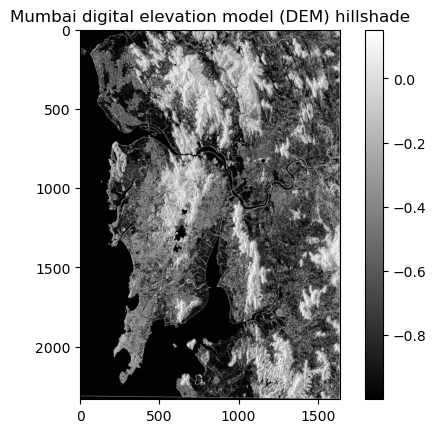

In [5]:
# open DEM 
with rasterio.open('data/in/MUM_DEM_TanDEM_X_30m.tif') as dem:
    dem_data = dem.read(1)
    
# calc slope and aspect
def calculate_slope_aspect(dem_data):
    x, y = np.gradient(dem_data)
    slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y))
    aspect = np.arctan2(-x, y)
    return slope, aspect

slope, aspect = calculate_slope_aspect(dem_data)

# create hillshade
def hillshade(array, azimuth, angle_altitude):
    x, y = np.gradient(array)
    slope, aspect = calculate_slope_aspect(array)
    shaded = np.sin(angle_altitude) * np.sin(slope) + np.cos(angle_altitude) * np.cos(slope) * np.cos(azimuth - aspect)
    return shaded

hill = hillshade(dem_data, 270, 30)

# plot hillshade
plt.imshow(hill, cmap='gray')
plt.colorbar()
plt.title('Mumbai digital elevation model (DEM) hillshade')
plt.show()

In [6]:
# function to calculate slope and aspect
def calculate_slope_aspect(dem_data):
    x, y = np.gradient(dem_data)
    slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y))
    aspect = np.arctan2(-x, y)
    return slope, aspect

# öoad DEM
with rasterio.open('data/in/MUM_DEM_TanDEM_X_30m.tif') as dem:
    dem_data = dem.read(1)
    meta = dem.meta

# calc slope and aspect
slope, aspect = calculate_slope_aspect(dem_data)

# update metadata for slope and aspect
meta.update(dtype=rasterio.float32)

# export slope
with rasterio.open('data/out/slope.tif', 'w', **meta) as dst:
    dst.write(slope.astype(rasterio.float32), 1)

# export aspect
with rasterio.open('data/out/aspect.tif', 'w', **meta) as dst:
    dst.write(aspect.astype(rasterio.float32), 1)


## Calculating hillshade using richdem 

In [7]:
import os
import richdem as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

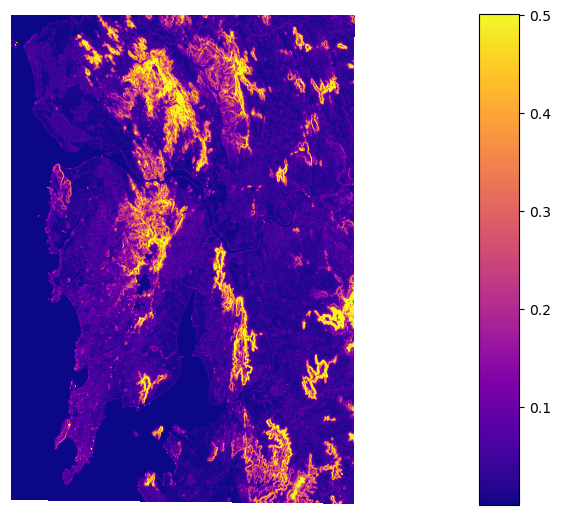

In [8]:
dem_path = 'data/in/MUM_DEM_TanDEM_X_30m.tif'
dem = rd.LoadGDAL(dem_path)

# calculate slope
slope = rd.TerrainAttribute(dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='plasma', figsize=(8,5.5))
plt.show()

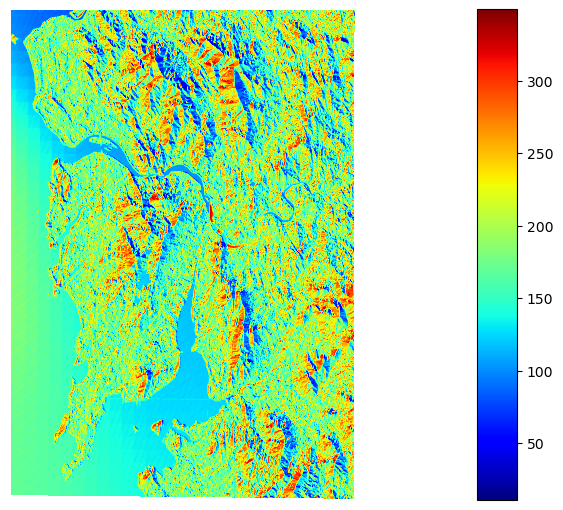

In [9]:
# calculate aspect
aspect = rd.TerrainAttribute(dem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8,5.5))
plt.show()

## calculate slope and aspect using earthpy

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio

In [11]:
dem = "data/in/MUM_DEM_TanDEM_X_30m.tif"

# open dem with rasterio
with rio.open(dem) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < -300] = np.nan
    
# check elevation
min_elevation = np.nanmin(elevation)
max_elevation = np.nanmax(elevation)
print('Min elevation:', min_elevation, '\nMax elevation:', max_elevation)



Min elevation: -163.27614 
Max elevation: 697.61523


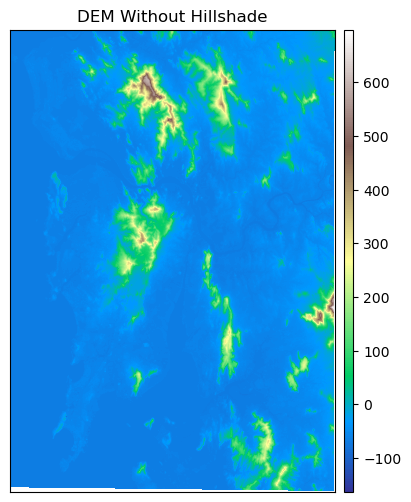

In [12]:


# Plot the data
ep.plot_bands(
    elevation,
    cmap="terrain",
    title="DEM Without Hillshade",
    figsize=(10, 6),
    vmin=min_elevation,
    vmax=max_elevation
)
plt.show()

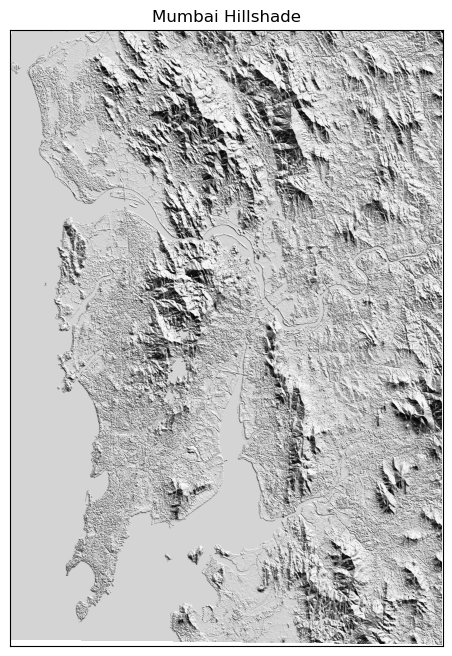

In [13]:
# create hillshade with earthpy
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Mumbai Hillshade",
    figsize=(10, 8)
)

plt.show()

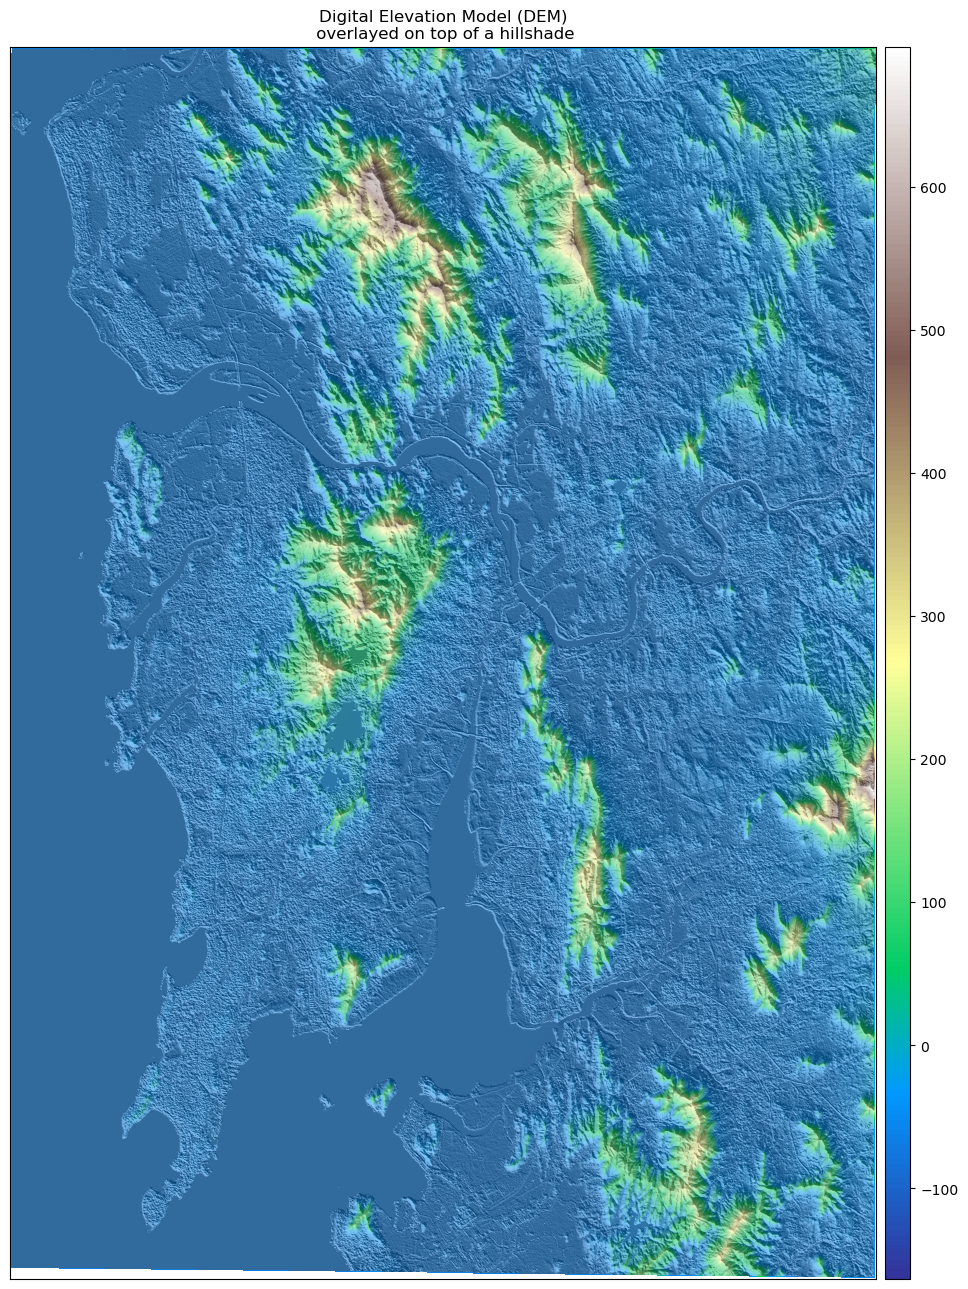

In [14]:
# overlay DEM and hillshade
fig, ax = plt.subplots(figsize=(25, 16))
ep.plot_bands(
    elevation,
    ax=ax,
    cmap="terrain",
    title="Digital Elevation Model (DEM)\n overlayed on top of a hillshade",
)
ax.imshow(hillshade, cmap="Greys", alpha=0.5)
plt.show()